[View in Colaboratory](https://colab.research.google.com/github/vpw/EIP2/blob/master/DNN-1st.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Conv2DTranspose, AveragePooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


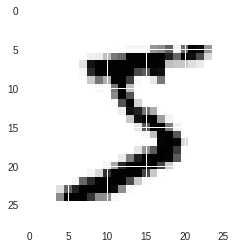

In [5]:
print (X_train.shape)
print (X_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Conv2D(32, kernel_size=(11, 11), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
#64, 18
model.add(Conv2D(128, 1, activation='relu'))
model.add(BatchNormalization(axis=-1))
#128, 18
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#32, 8
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 6
model.add(SeparableConv2D(16, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#16, 4
model.add(Flatten())
#1, 16*16
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 18, 32)        3904      
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 18, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 128)       4224      
_________________________________________________________________
batch_normalization_2 (Batch (None, 18, 18, 128)       512       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 16, 16, 32)        5280      
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:

model.fit(X_train, Y_train, batch_size=32, nb_epoch=2, verbose=1, validation_split=0.4, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 55s 922us/step - loss: 0.0086 - acc: 0.9969 - val_loss: 0.0300 - val_acc: 0.9908
Epoch 2/2
60000/60000 [==============================] - 52s 864us/step - loss: 0.0087 - acc: 0.9969 - val_loss: 0.0269 - val_acc: 0.9922


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.026890740412260722, 0.9922]


In [0]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred[:9])
print(y_test[:9])

[[1.05956097e-13 1.28413769e-08 7.14851645e-09 3.04153724e-09
  2.10441753e-09 4.96849541e-11 1.68032808e-16 1.00000000e+00
  1.00432852e-13 2.59709743e-09]
 [2.40163750e-10 5.88544283e-11 1.00000000e+00 1.15452136e-12
  1.11791835e-13 2.64833136e-16 2.54344011e-11 4.03051786e-10
  5.52325199e-12 2.08155606e-12]
 [2.26188036e-15 1.00000000e+00 2.72941697e-10 6.53753115e-15
  7.48500706e-10 2.59306715e-10 2.22520309e-12 7.70902631e-09
  7.04939648e-11 1.80722001e-14]
 [9.99999046e-01 9.15340225e-15 6.02013318e-12 1.32777998e-13
  4.24403221e-11 1.69218439e-09 9.06675041e-07 2.28257604e-12
  4.49896259e-10 7.86774201e-09]
 [3.58793095e-12 1.40579509e-14 1.11529621e-13 4.14488525e-14
  9.99995828e-01 6.70122281e-15 1.47878845e-12 3.19998833e-10
  9.00080066e-10 4.21270897e-06]
 [8.18021899e-15 1.00000000e+00 1.43209802e-11 5.01988021e-17
  7.30183303e-10 1.35132374e-11 7.94544281e-13 3.21745830e-09
  5.17003324e-12 1.36633301e-14]
 [1.41152823e-13 2.91408071e-07 3.29348666e-11 3.12903295e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

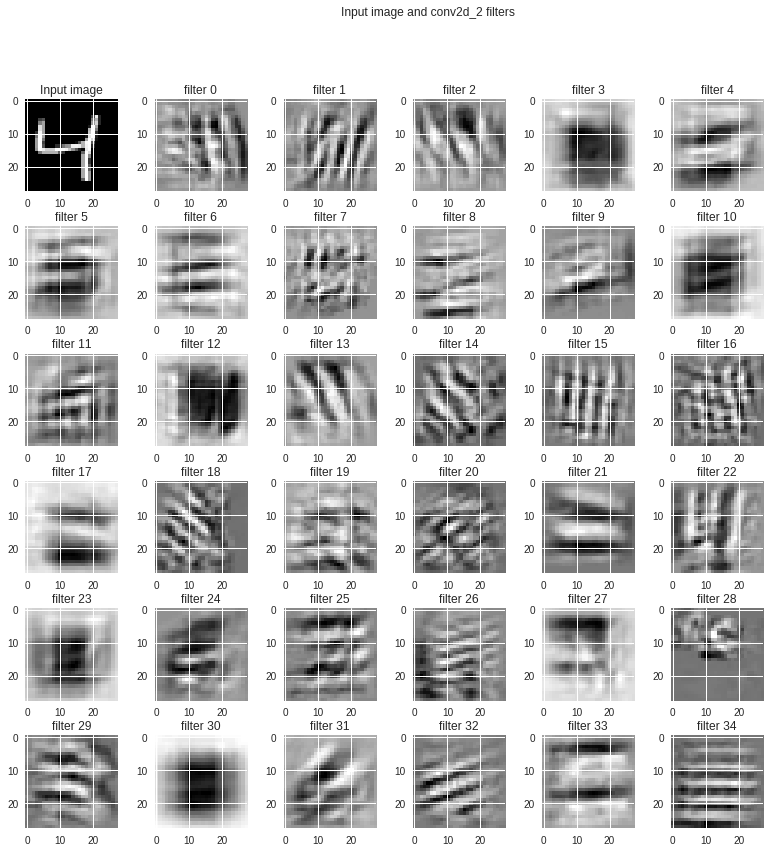

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_2')